In [1]:
# Clustering of timeseries data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import tsfresh
import sompy

Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
agg = pd.read_csv('sku_labels.csv')
df = pd.read_csv('extracted_features.csv')
df.head()

,id,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""",...,sales__time_reversal_asymmetry_statistic__lag_1,sales__time_reversal_asymmetry_statistic__lag_2,sales__time_reversal_asymmetry_statistic__lag_3,sales__value_count__value_-inf,sales__value_count__value_0,sales__value_count__value_1,sales__value_count__value_inf,sales__value_count__value_nan,sales__variance,sales__variance_larger_than_standard_deviation
0,28,455.0,228.0,0.009909,-0.001607,0.001339,0.188732,0.359772,0.035937,0.011302,...,0.031519,-0.083333,0.000000,0.0,643.0,25.0,0.0,0.0,0.621100,0.0
1,34,186.0,226.0,-0.004615,-0.017574,0.001181,1.335614,-0.138257,-0.006001,0.005213,...,-0.008633,0.014430,-0.014472,0.0,600.0,78.0,0.0,0.0,0.236220,0.0
2,100,6946.0,1549.0,0.009112,0.010989,0.001624,7.239437,-0.195348,-0.028886,0.017587,...,-2.063037,-0.877874,-0.746398,0.0,171.0,157.0,0.0,0.0,5.145510,1.0
3,152,78.0,85.0,-0.002430,-0.012023,0.001742,0.699379,-0.093300,-0.003946,0.005144,...,0.002933,-0.002941,0.000000,0.0,655.0,16.0,0.0,0.0,0.109897,0.0
4,182,4038.0,1163.0,-0.005931,-0.003367,0.001556,3.848592,0.159739,0.028471,0.021181,...,0.735336,2.065997,1.467626,0.0,327.0,135.0,0.0,0.0,4.060313,1.0


In [3]:
agg.head()

,sku_key,sku_department,sku_subdepartment,sku_category,sku_subcategory
0,28,TY,06,063,20G
1,34,TY,4,11,35A
2,100,BH,02,38,C09
3,152,BH,02,139,00L
4,182,TY,8,33,16K


In [4]:
df.dropna(axis=1, inplace=True)

In [5]:
df.shape

(3193, 442)

In [6]:
scale = MinMaxScaler()
skus = df['id']
df.set_index('id', inplace=True)
X = scale.fit_transform(df)

In [7]:
X.shape

(3193, 441)

In [8]:
names = df.columns

## SOMPY implementation

In [9]:
from sompy.sompy import SOMFactory

In [16]:
sm = SOMFactory().build(X, normalization = 'var', mapsize=(10,10), initialization='pca')
sm.train(n_job=1, verbose='info', train_rough_len=20, train_finetune_len=20)

 Training...
 pca_linear_initialization took: 0.091000 seconds
 Rough training...
 radius_ini: 2.000000 , radius_final: 1.000000, trainlen: 20

 epoch: 1 ---> elapsed time:  0.134000, quantization error: 17.496379

 epoch: 2 ---> elapsed time:  0.133000, quantization error: 12.624678

 epoch: 3 ---> elapsed time:  0.137000, quantization error: 11.945917

 epoch: 4 ---> elapsed time:  0.133000, quantization error: 11.697317

 epoch: 5 ---> elapsed time:  0.135000, quantization error: 11.617048

 epoch: 6 ---> elapsed time:  0.138000, quantization error: 11.564358

 epoch: 7 ---> elapsed time:  0.137000, quantization error: 11.529485

 epoch: 8 ---> elapsed time:  0.138000, quantization error: 11.500291

 epoch: 9 ---> elapsed time:  0.133000, quantization error: 11.473793

 epoch: 10 ---> elapsed time:  0.133000, quantization error: 11.447584

 epoch: 11 ---> elapsed time:  0.133000, quantization error: 11.421810

 epoch: 12 ---> elapsed time:  0.138000, quantization error: 11.395447

 

In [17]:
topographic_error = sm.calculate_topographic_error()
quantization_error = np.mean(sm._bmu[1])
print ("Topographic error = %s; Quantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.06796116504854369; Quantization error = 11.12972146682339


In [18]:
from sompy.visualization.mapview import View2D

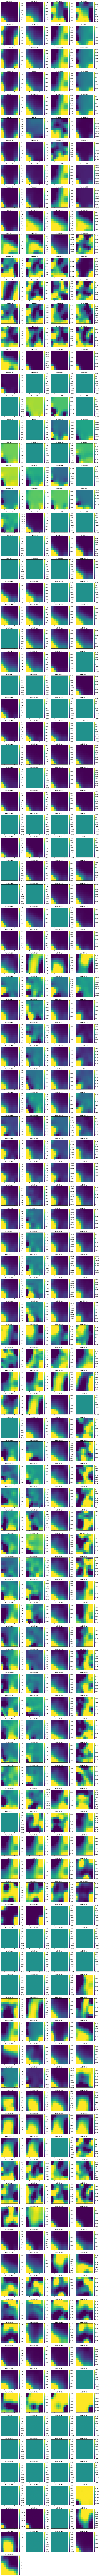

In [19]:
from sompy.visualization.mapview import View2D
view2D  = View2D(15,15,"time-series",text_size=10, names=names)
view2D.show(sm, col_sz=4, which_dim="all", denormalize=True)

In [20]:
from sompy.visualization.bmuhits import BmuHitsView

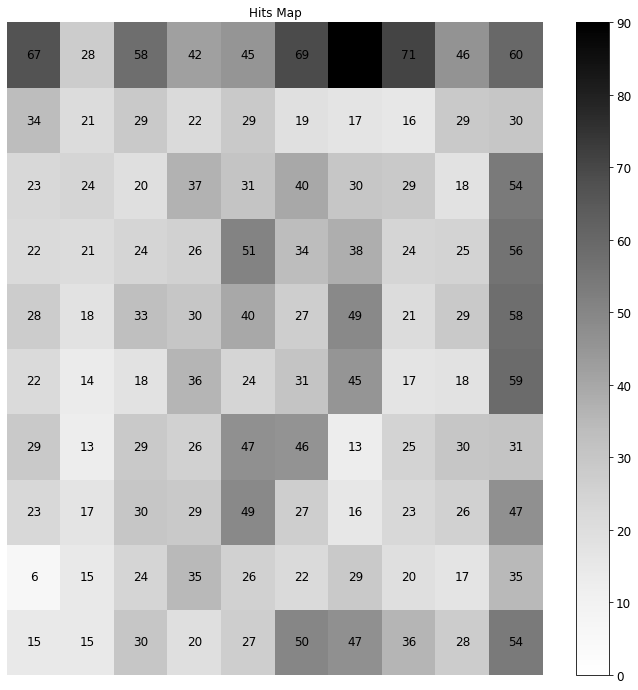

In [21]:
vhts  = BmuHitsView(12,12,"Hits Map",text_size=12)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=12, cmap="Greys", logaritmic=False)

In [22]:
sm._calculate_ms_and_mpd()

(10, 0.03131850923896023)

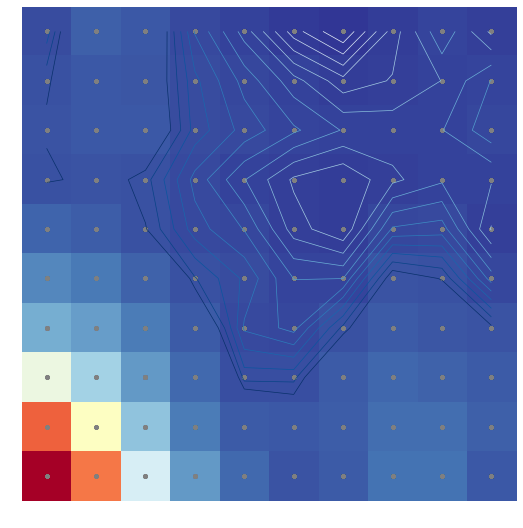

In [23]:
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)
UMAT  = u.build_u_matrix(sm, distance=1, row_normalized=False)
UMAT = u.show(sm, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


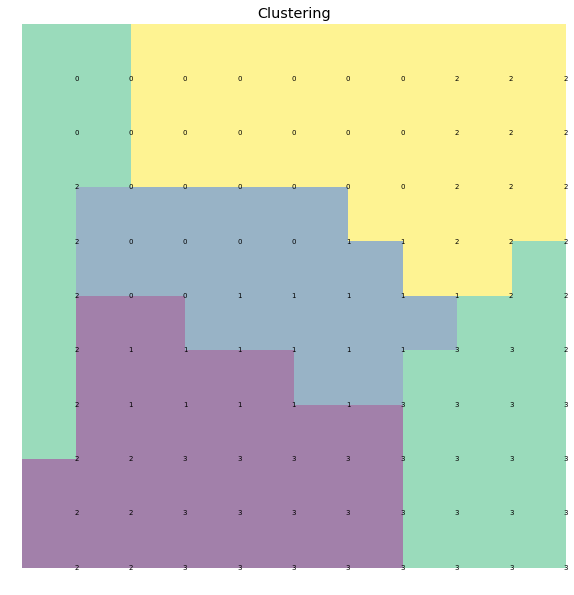

In [24]:
from sompy.visualization.hitmap import HitMapView
sm.cluster(4)
hits  = HitMapView(10,10,"Clustering",text_size=12)
a=hits.show(sm)

In [25]:
from sklearn.cluster import KMeans

In [26]:
scores = {}
for i in range(1, 40):
    kmeans = KMeans(n_clusters=i)
    clusters_fit = kmeans.fit_predict(sm._normalizer.denormalize_by(sm.data_raw, sm.codebook.matrix))
    scores[i] = kmeans.inertia_

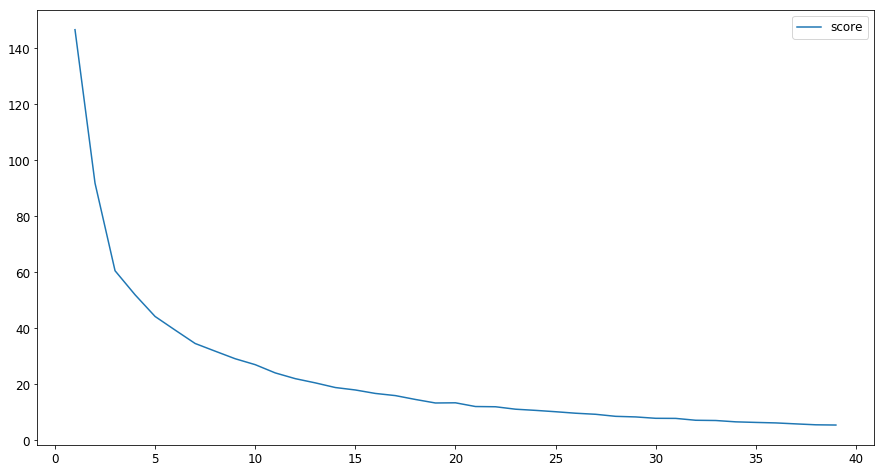

In [27]:
pd.DataFrame(scores, index=['score']).T.plot(figsize=(15,8))

In [28]:
clusters = sm.cluster(n_clusters=5)

In [29]:
clusters

array([2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 4,
       4, 4, 0, 0, 0, 2, 1, 1, 4, 4, 4, 4, 4, 0, 2, 2, 1, 1, 3, 4, 4, 4,
       4, 1, 2, 2, 1, 3, 3, 3, 4, 4, 4, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 1,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 1, 2, 2])

In [30]:
map_dict = {}
for i, j in enumerate(clusters):
    map_dict[i] = j

In [31]:
assignment = pd.DataFrame(sm._bmu).T

In [32]:
assignment[0] = assignment[0].astype(int)
assignment.head()

,0,1
0,9,9.891287
1,34,6.748976
2,71,11.765328
3,5,7.123546
4,94,9.640809


In [33]:
cluster_assignments = assignment[0].map(map_dict)

In [34]:
df_assigned = df.reset_index().join(pd.DataFrame(cluster_assignments))

In [35]:
df_assigned.head()

,id,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""",...,sales__time_reversal_asymmetry_statistic__lag_2,sales__time_reversal_asymmetry_statistic__lag_3,sales__value_count__value_-inf,sales__value_count__value_0,sales__value_count__value_1,sales__value_count__value_inf,sales__value_count__value_nan,sales__variance,sales__variance_larger_than_standard_deviation,0
0,28,455.0,228.0,0.009909,-0.001607,0.001339,0.188732,0.359772,0.035937,0.011302,...,-0.083333,0.000000,0.0,643.0,25.0,0.0,0.0,0.621100,0.0,0
1,34,186.0,226.0,-0.004615,-0.017574,0.001181,1.335614,-0.138257,-0.006001,0.005213,...,0.014430,-0.014472,0.0,600.0,78.0,0.0,0.0,0.236220,0.0,0
2,100,6946.0,1549.0,0.009112,0.010989,0.001624,7.239437,-0.195348,-0.028886,0.017587,...,-0.877874,-0.746398,0.0,171.0,157.0,0.0,0.0,5.145510,1.0,3
3,152,78.0,85.0,-0.002430,-0.012023,0.001742,0.699379,-0.093300,-0.003946,0.005144,...,-0.002941,0.000000,0.0,655.0,16.0,0.0,0.0,0.109897,0.0,0
4,182,4038.0,1163.0,-0.005931,-0.003367,0.001556,3.848592,0.159739,0.028471,0.021181,...,2.065997,1.467626,0.0,327.0,135.0,0.0,0.0,4.060313,1.0,3


### To do:

* Clean up code and remove all redundant code
* Run EDA on clusters, see if you can extract meaning and the features that seperate them/


## t-SNE

In [36]:
dimred = TSNE()
plot_df = dimred.fit_transform(X)
plot_df = pd.DataFrame(plot_df).join(df.reset_index())
plot_df.head()

,0,1,id,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""",...,sales__time_reversal_asymmetry_statistic__lag_1,sales__time_reversal_asymmetry_statistic__lag_2,sales__time_reversal_asymmetry_statistic__lag_3,sales__value_count__value_-inf,sales__value_count__value_0,sales__value_count__value_1,sales__value_count__value_inf,sales__value_count__value_nan,sales__variance,sales__variance_larger_than_standard_deviation
0,2.047177,28.152983,28,455.0,228.0,0.009909,-0.001607,0.001339,0.188732,0.359772,...,0.031519,-0.083333,0.000000,0.0,643.0,25.0,0.0,0.0,0.621100,0.0
1,12.987599,15.609614,34,186.0,226.0,-0.004615,-0.017574,0.001181,1.335614,-0.138257,...,-0.008633,0.014430,-0.014472,0.0,600.0,78.0,0.0,0.0,0.236220,0.0
2,-51.336746,-20.556299,100,6946.0,1549.0,0.009112,0.010989,0.001624,7.239437,-0.195348,...,-2.063037,-0.877874,-0.746398,0.0,171.0,157.0,0.0,0.0,5.145510,1.0
3,46.885487,16.754988,152,78.0,85.0,-0.002430,-0.012023,0.001742,0.699379,-0.093300,...,0.002933,-0.002941,0.000000,0.0,655.0,16.0,0.0,0.0,0.109897,0.0
4,-35.877804,0.604311,182,4038.0,1163.0,-0.005931,-0.003367,0.001556,3.848592,0.159739,...,0.735336,2.065997,1.467626,0.0,327.0,135.0,0.0,0.0,4.060313,1.0


In [37]:
dimred.kl_divergence_

1.5668572187423706

In [38]:
plot_df['sku_key'] = plot_df['id'].astype(int)
agg['sku_key'] = agg['sku_key'].astype(int)

plot_df = plot_df.merge(agg, how='left', on='sku_key')

In [39]:
listof = {}
for i, j in enumerate(plot_df['sku_department'].unique()):
    listof[j] = i

In [40]:
plot_df['sku_department'] = plot_df['sku_department'].map(listof)

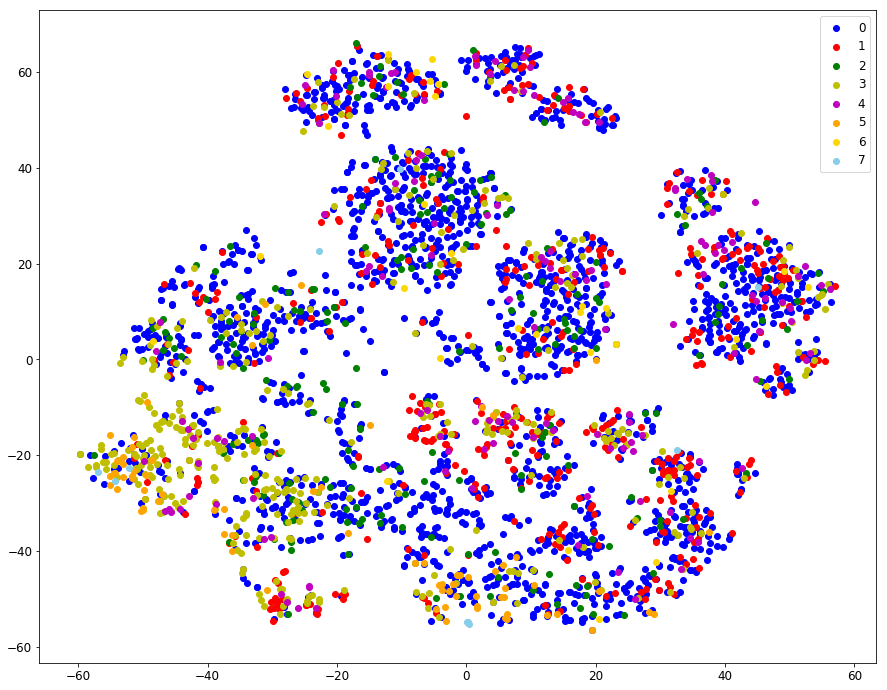

In [41]:
f, ax = plt.subplots(figsize=(15,12))

colors=['b', 'r', 'g', 'y', 'm', 'orange', 'gold', 'skyblue']

for i in plot_df['sku_department'].unique():
    ax.scatter(plot_df[plot_df['sku_department'] == i][0], plot_df[plot_df['sku_department'] == i][1],
    color=colors[i], label=i)           
    
ax.legend()

In [42]:
new_df = plot_df.join(pd.DataFrame(cluster_assignments), rsuffix='clus')
new_df.rename(columns={'0':'tsne1', 1:'tsne2', '0clus':'cluster'}, inplace=True)
new_df.head()

,tsne1,tsne2,id,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""",...,sales__value_count__value_inf,sales__value_count__value_nan,sales__variance,sales__variance_larger_than_standard_deviation,sku_key,sku_department,sku_subdepartment,sku_category,sku_subcategory,cluster
0,2.047177,28.152983,28,455.0,228.0,0.009909,-0.001607,0.001339,0.188732,0.359772,...,0.0,0.0,0.621100,0.0,28,0,06,063,20G,0
1,12.987599,15.609614,34,186.0,226.0,-0.004615,-0.017574,0.001181,1.335614,-0.138257,...,0.0,0.0,0.236220,0.0,34,0,4,11,35A,0
2,-51.336746,-20.556299,100,6946.0,1549.0,0.009112,0.010989,0.001624,7.239437,-0.195348,...,0.0,0.0,5.145510,1.0,100,1,02,38,C09,3
3,46.885487,16.754988,152,78.0,85.0,-0.002430,-0.012023,0.001742,0.699379,-0.093300,...,0.0,0.0,0.109897,0.0,152,1,02,139,00L,0
4,-35.877804,0.604311,182,4038.0,1163.0,-0.005931,-0.003367,0.001556,3.848592,0.159739,...,0.0,0.0,4.060313,1.0,182,0,8,33,16K,3


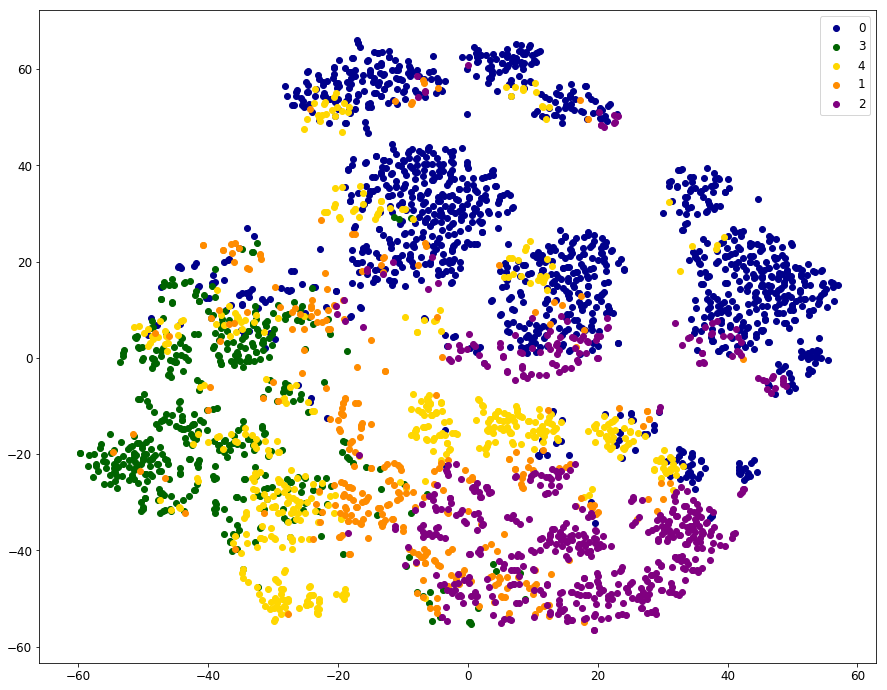

In [43]:
f, ax = plt.subplots(figsize=(15,12))

colors=['darkblue', 'darkorange', 'purple', 'darkgreen', 'gold', 'darkred']

for i in new_df['cluster'].unique():
    ax.scatter(new_df[new_df['cluster'] == i]['tsne1'], new_df[new_df['cluster'] == i]['tsne2'],
    color=colors[i], label=i)           
    
ax.legend()

## Extract insights from clusters

In [44]:
new_df.head()

,tsne1,tsne2,id,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""",...,sales__value_count__value_inf,sales__value_count__value_nan,sales__variance,sales__variance_larger_than_standard_deviation,sku_key,sku_department,sku_subdepartment,sku_category,sku_subcategory,cluster
0,2.047177,28.152983,28,455.0,228.0,0.009909,-0.001607,0.001339,0.188732,0.359772,...,0.0,0.0,0.621100,0.0,28,0,06,063,20G,0
1,12.987599,15.609614,34,186.0,226.0,-0.004615,-0.017574,0.001181,1.335614,-0.138257,...,0.0,0.0,0.236220,0.0,34,0,4,11,35A,0
2,-51.336746,-20.556299,100,6946.0,1549.0,0.009112,0.010989,0.001624,7.239437,-0.195348,...,0.0,0.0,5.145510,1.0,100,1,02,38,C09,3
3,46.885487,16.754988,152,78.0,85.0,-0.002430,-0.012023,0.001742,0.699379,-0.093300,...,0.0,0.0,0.109897,0.0,152,1,02,139,00L,0
4,-35.877804,0.604311,182,4038.0,1163.0,-0.005931,-0.003367,0.001556,3.848592,0.159739,...,0.0,0.0,4.060313,1.0,182,0,8,33,16K,3


In [52]:
product_sales = pd.read_csv('aggregate_products.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [53]:
product_sales['sku_key'] = product_sales['sku_key'].astype(int)
product_sales.drop(['sku_department', 'sku_subdepartment', 'sku_category', 'sku_subcategory'], axis=1, inplace=True)
product_sales.head()

,sku_key,tran_date,sales,selling_price,avg_discount
0,28,2016-03-02,1,89.9,0.0
1,28,2016-03-03,0,89.9,0.0
2,28,2016-03-04,0,89.9,0.0
3,28,2016-03-05,0,89.9,0.0
4,28,2016-03-06,0,89.9,0.0


In [54]:
cluster_dfs = {}
for i in new_df['cluster'].unique():
    cluster_dfs['cluster_{}'.format(i)] = new_df[new_df['cluster'] == i]

In [55]:
for i in cluster_dfs.keys():
    cluster_dfs[i] = cluster_dfs[i].merge(product_sales, on='sku_key')

In [56]:
cluster_dfs['cluster_0'].head()

,tsne1,tsne2,id,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""",...,sku_key,sku_department,sku_subdepartment,sku_category,sku_subcategory,cluster,tran_date,sales,selling_price,avg_discount
0,2.047177,28.152983,28,455.0,228.0,0.009909,-0.001607,0.001339,0.188732,0.359772,...,28,0,06,063,20G,0,2016-03-02,1,89.9,0.0
1,2.047177,28.152983,28,455.0,228.0,0.009909,-0.001607,0.001339,0.188732,0.359772,...,28,0,06,063,20G,0,2016-03-03,0,89.9,0.0
2,2.047177,28.152983,28,455.0,228.0,0.009909,-0.001607,0.001339,0.188732,0.359772,...,28,0,06,063,20G,0,2016-03-04,0,89.9,0.0
3,2.047177,28.152983,28,455.0,228.0,0.009909,-0.001607,0.001339,0.188732,0.359772,...,28,0,06,063,20G,0,2016-03-05,0,89.9,0.0
4,2.047177,28.152983,28,455.0,228.0,0.009909,-0.001607,0.001339,0.188732,0.359772,...,28,0,06,063,20G,0,2016-03-06,0,89.9,0.0




 sales
cluster_0


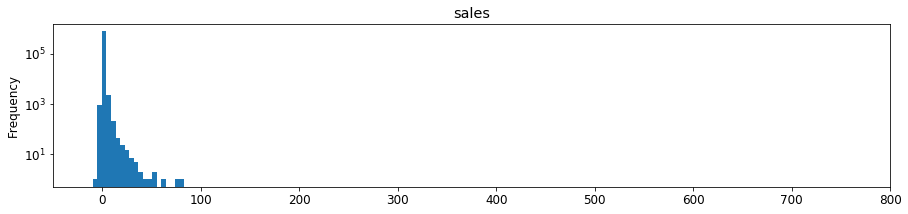

cluster_3


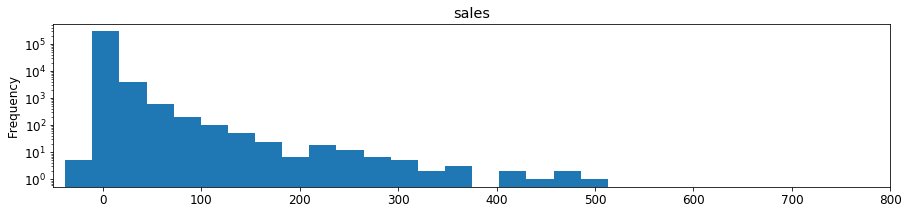

cluster_4


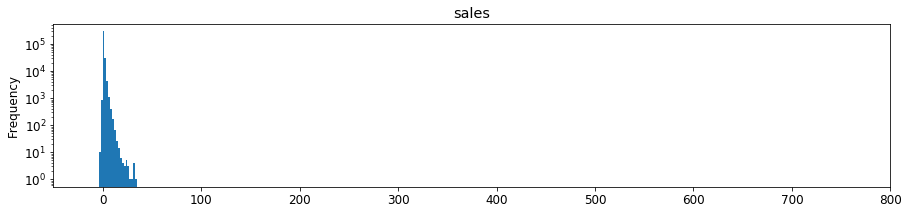

cluster_1


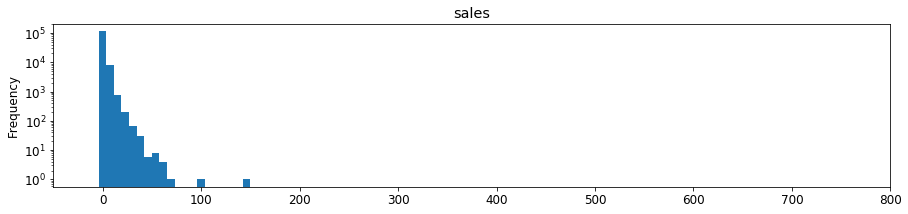

cluster_2


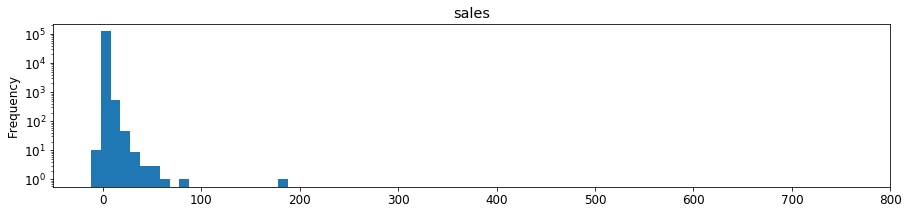



 selling_price
cluster_0


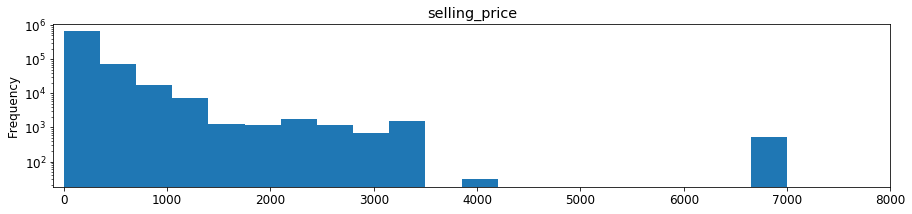

cluster_3


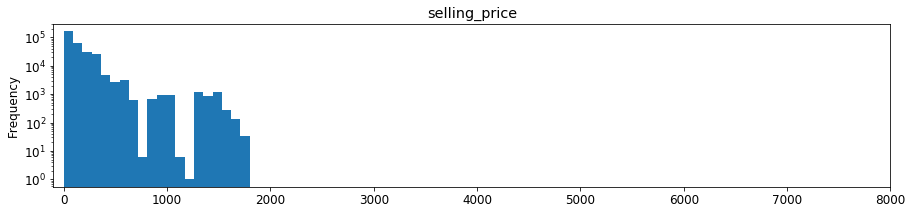

cluster_4


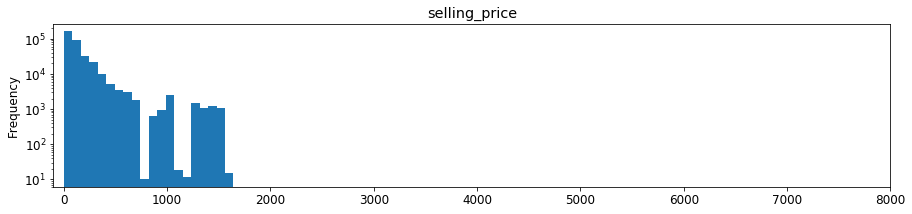

cluster_1


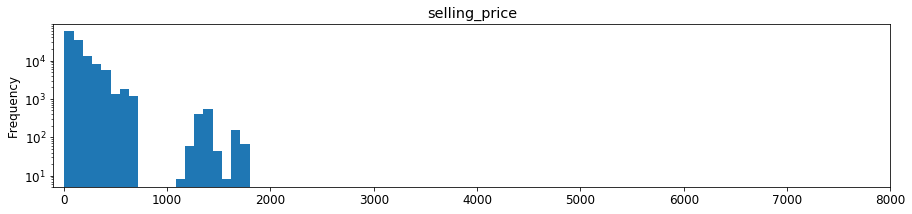

cluster_2


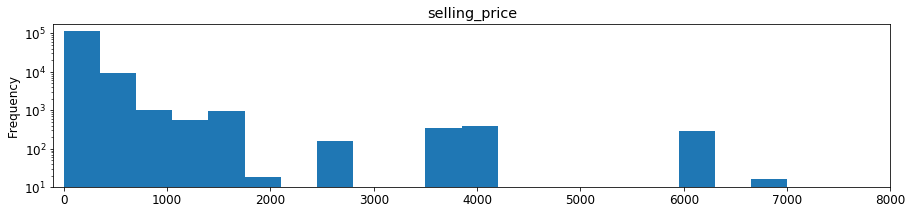



 avg_discount
cluster_0


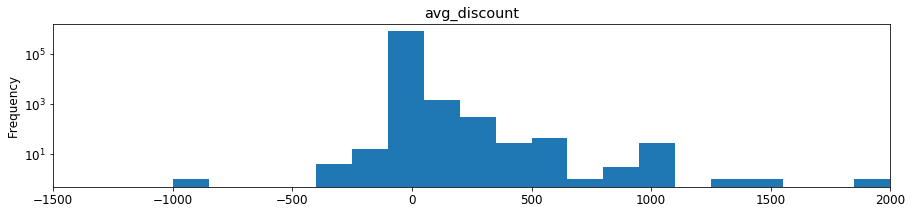

cluster_3


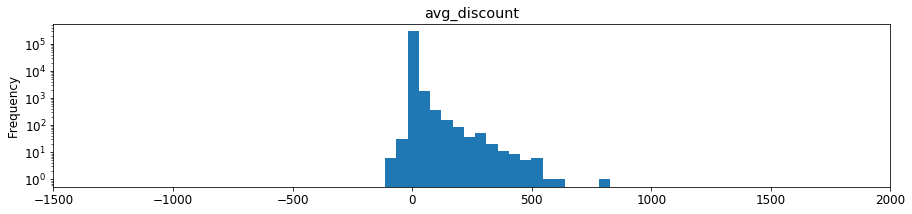

cluster_4


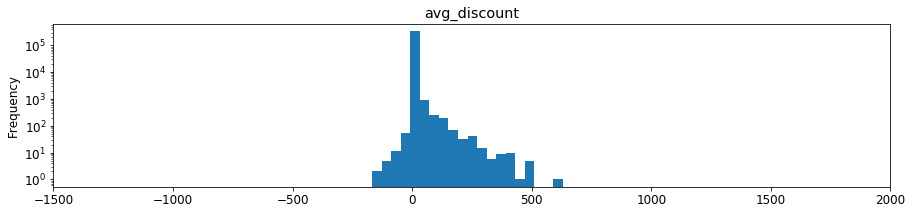

cluster_1


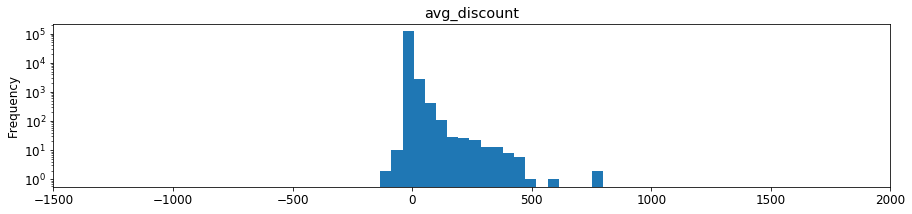

cluster_2


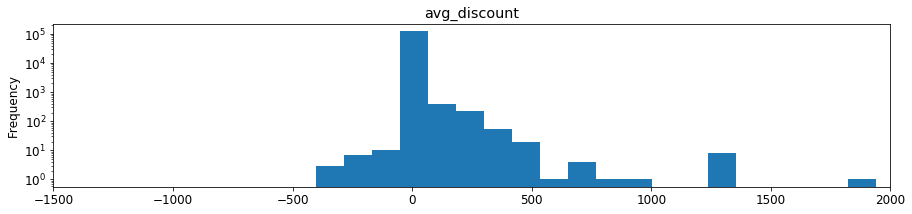

In [83]:
for j in ['sales', 'selling_price', 'avg_discount']:
    print('\n\n', j)
    for i in cluster_dfs.keys():
        print(i)
        plt.figure(figsize=(15,3))
        cluster_dfs[i][j].plot(kind='hist', bins=20, logy=True)
        plt.title(j)
        if j == 'sales':
            plt.xlim(-50, 800)
        elif j == 'selling_price':
            plt.xlim(-100, 8000)
        elif j == 'avg_discount':
            plt.xlim(-1500, 2000)
        
        plt.show()

KeyboardInterrupt: 

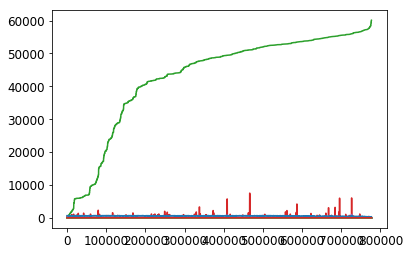

In [86]:
cluster_dfs['cluster_0'].plot()